In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [143]:
np.random.seed(42)

X = 20 + 130 * np.random.rand(200, 1)
pricePerSquareMeter = 8000 + 7000 * np.random.rand(200, 1)
y = pricePerSquareMeter * X

noise = np.random.randn(200, 1) * 50000
y += noise 

y = np.maximum(y, 10000)
y = y / 1000

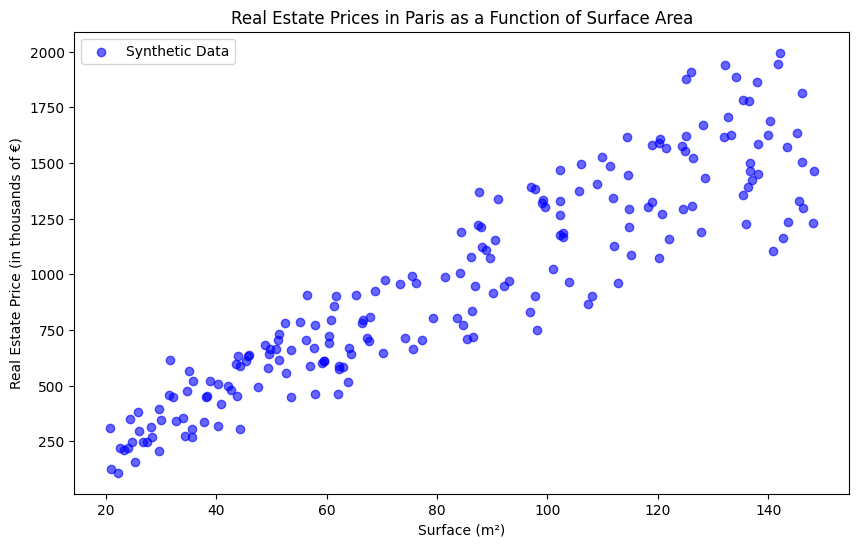

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Synthetic Data')
plt.xlabel('Surface (m²)')
plt.ylabel('Real Estate Price (in thousands of €)')
plt.title('Real Estate Prices in Paris as a Function of Surface Area')
plt.legend()
plt.show()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

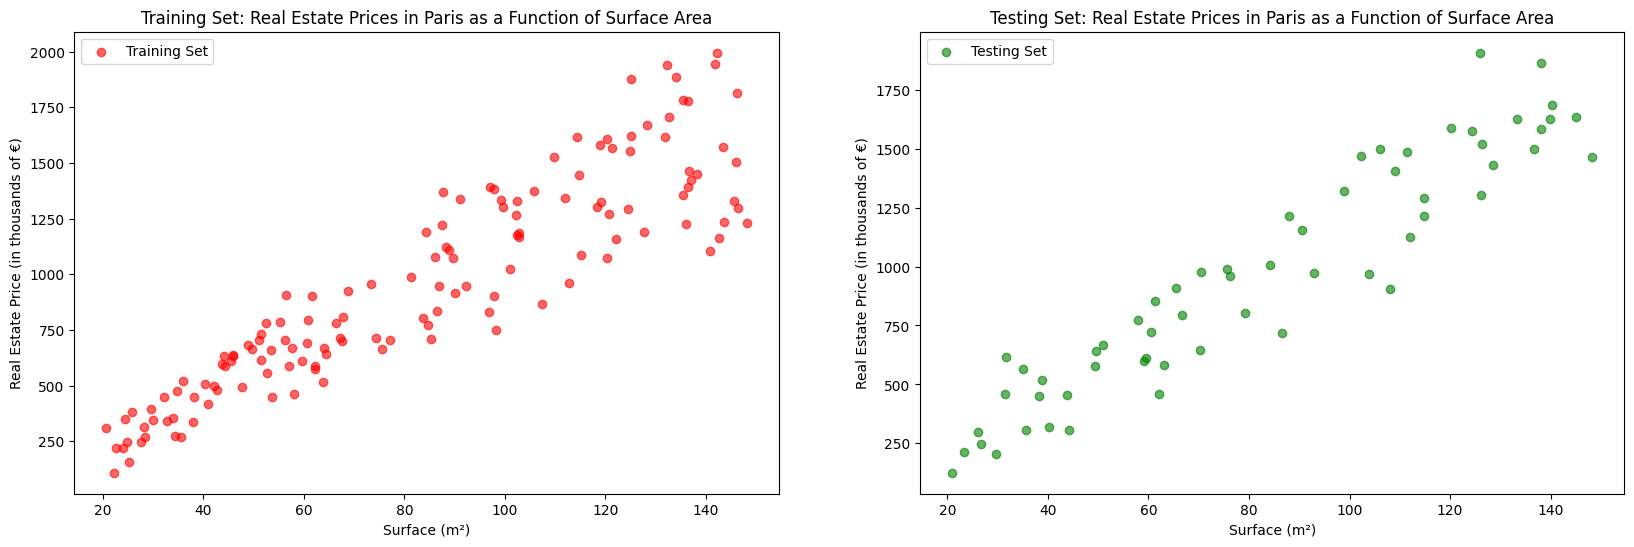

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].scatter(X_train, y_train, color='red', alpha=0.6, label='Training Set')
ax[0].set_xlabel('Surface (m²)')
ax[0].set_ylabel('Real Estate Price (in thousands of €)')
ax[0].set_title('Training Set: Real Estate Prices in Paris as a Function of Surface Area')
ax[0].legend()

ax[1].scatter(X_test, y_test, color='green', alpha=0.6, label='Testing Set')
ax[1].set_xlabel('Surface (m²)')
ax[1].set_ylabel('Real Estate Price (in thousands of €)')
ax[1].set_title('Testing Set: Real Estate Prices in Paris as a Function of Surface Area')
ax[1].legend()

plt.show()

In [147]:
theta0 = 0
theta1 = 0

In [148]:
def MSE(y_predicted, y_observed):
    """ 
    Compute the Mean Squared Error.
    """
    if (len(y_predicted) != len(y_observed)):
        print("Length are different.")
        return
    return ((sum((y_predicted[i] - y_observed[i])**2 for i in range(len(y_predicted)))) / (2 * len(y_predicted))) 

print(MSE(np.array([4, 5, 6]), np.array([8, 9, 10])))

8.0


In [149]:
def gradientDescent(alpha, numIterations):
    global theta0, theta1 
    m = len(X_train)  
    costHistory = [] 

    for i in range(numIterations):
        y_pred = theta0 + theta1 * X_train[:, 0]
        
        errors = y_pred - y_train[:, 0]
        
        d_theta0 = (errors.sum()) / m
        d_theta1 = (errors * X_train[:, 0]).sum() / m
        
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
        
        cost = MSE(y_pred, y_train[:, 0])
        costHistory.append(cost)
        
        if (i+1) % 100 == 0:
            print(f"Iteration {i+1}: Cost = {cost:.4f}, theta0 = {theta0:.4f}, theta1 = {theta1:.4f}")
    
    return costHistory

Iteration 100: Cost = 120148.5000, theta0 = 0.0647, theta1 = 6.4620
Iteration 200: Cost = 37139.0403, theta0 = 0.0929, theta1 = 9.2447
Iteration 300: Cost = 21746.5407, theta0 = 0.1054, theta1 = 10.4429
Iteration 400: Cost = 18892.2969, theta0 = 0.1111, theta1 = 10.9589
Iteration 500: Cost = 18363.0297, theta0 = 0.1139, theta1 = 11.1811
Iteration 600: Cost = 18264.8844, theta0 = 0.1154, theta1 = 11.2767
Iteration 700: Cost = 18246.6823, theta0 = 0.1164, theta1 = 11.3179
Iteration 800: Cost = 18243.3041, theta0 = 0.1172, theta1 = 11.3357
Iteration 900: Cost = 18242.6747, theta0 = 0.1179, theta1 = 11.3433
Iteration 1000: Cost = 18242.5551, theta0 = 0.1185, theta1 = 11.3466
Iteration 1100: Cost = 18242.5299, theta0 = 0.1192, theta1 = 11.3480
Iteration 1200: Cost = 18242.5223, theta0 = 0.1198, theta1 = 11.3486
Iteration 1300: Cost = 18242.5179, theta0 = 0.1204, theta1 = 11.3489
Iteration 1400: Cost = 18242.5142, theta0 = 0.1210, theta1 = 11.3490
Iteration 1500: Cost = 18242.5105, theta0 = 

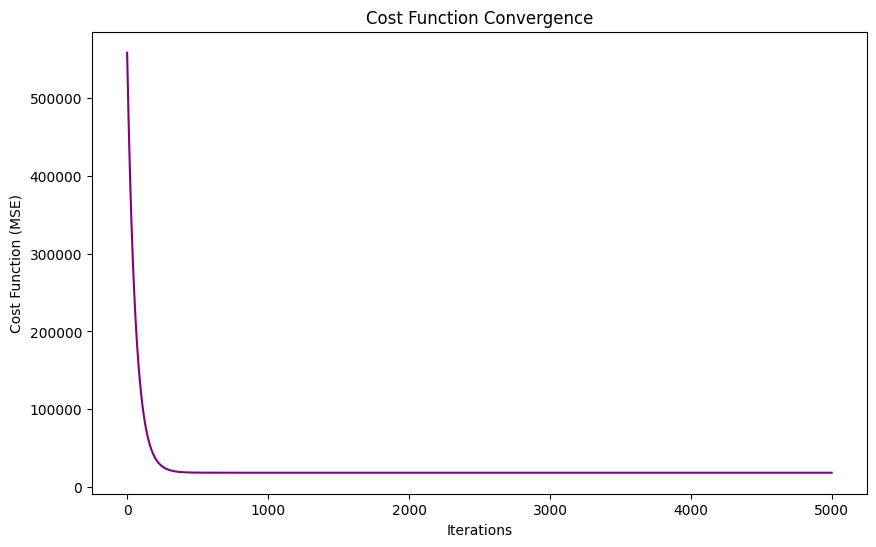

Test Set MSE: 13225.4271


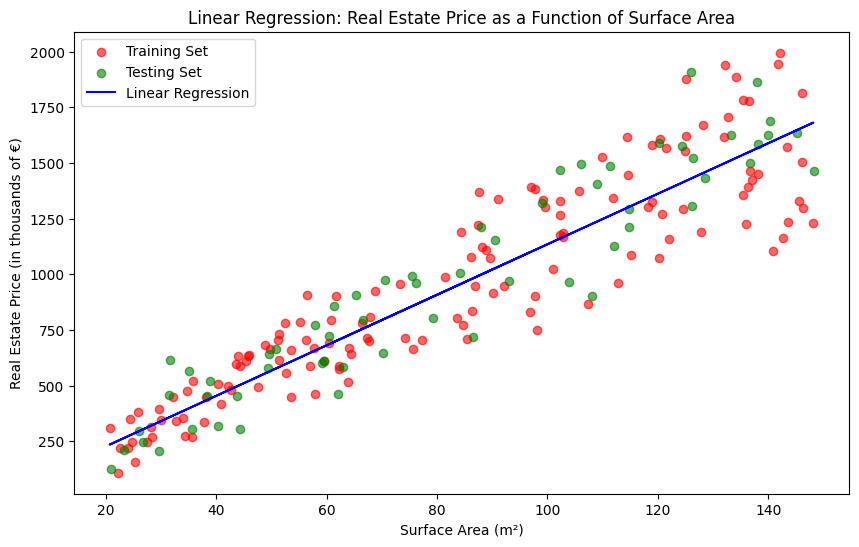

Optimized Parameters: theta0 = 0.1426, theta1 = 11.3488


In [150]:
alpha = 0.000001
numIterations = 5000

costHistory = gradientDescent(alpha, numIterations)

plt.figure(figsize=(10, 6))
plt.plot(range(numIterations), costHistory, color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost Function (MSE)')
plt.title('Cost Function Convergence')
plt.show()

y_test_pred = theta0 + theta1 * X_test[:, 0]

testMse = MSE(y_test_pred, y_test[:, 0])
print(f"Test Set MSE: {testMse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', alpha=0.6, label='Training Set')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Testing Set')
plt.plot(X_train, theta0 + theta1 * X_train[:, 0], color='blue', label='Linear Regression')
plt.xlabel('Surface Area (m²)')
plt.ylabel('Real Estate Price (in thousands of €)')
plt.title('Linear Regression: Real Estate Price as a Function of Surface Area')
plt.legend()
plt.show()

print(f"Optimized Parameters: theta0 = {theta0:.4f}, theta1 = {theta1:.4f}")
